# Local magnitude


```{contents} Sections
:local:
:depth: 2
```

```{div} full-width

The (Richter or) local magnitude $M_L$ is defined as 

$$
\begin{align}
& M_L = \log_{10}\left(\frac{A}{\mathrm{m}}\right) + 6 + Z(r)
\end{align}
$$ (M:1)

where $A$ is the maximum amplitude on a Wood-Anderson seismogram (Anderson and Wood 1925), $r$ is the hypocentral distance and $Z$ is a distance correction that, according to Hutton and Boore (1996), reads 

$$
\begin{align}
& Z(r) = a\,\log_{10}\left(\frac{r}{100\,\mathrm{km}}\right) + b\,\left(\frac{r}{100\,\mathrm{km}}-1\right)  
\end{align}
$$ (M:2)

Here $a$ and $b$ are two constants accounting for the geometrical spreading and the anaelastic attenuation. For crustal earthquakes in regions with attenuative properties similar to those of Southern California, the values proposed by the [International Association of Seismology and Physics of the Earth's Interior (IASPEI)](http://iaspei.org/) are $a=1.110$ and $b=0.189$. We note that

$$
\begin{align}
& Z(100\,\mathrm{km}) = 0
\end{align}
$$ (M:3)

In order to anchor this magnitude scale to some particular number, a magnitude $M_L=3$ earthquake at $100\,\mathrm{km}$ distance was defined to have maximum amplitude of $1\,\mathrm{mm}$ on the Wood-Anderson seismogram. Even better, we could say that  a magnitude $M_L=0$ earthquake at $100\,\mathrm{km}$ distance was defined to have maximum amplitude of $1\,\mu\mathrm{m}$ on the Wood-Anderson seismogram.


The specific form of the distance correction function comes from the following simple model of the dependence of the displacement amplitude on the hypocentral distance, which accounts both for the geometrical spreading and for the anaelastic attenuation,

$$
\begin{align}
& A \propto r^{-\gamma}\,e^{-\frac{\omega\,r}{2\,c_s\,Q_s(\omega)}}
\end{align}
$$ (M:4)

Here, $\gamma$ is the geometrical spreading (which shoulb be equal to $1$ for body waves and $1/2$ for surface waves), $\omega$ is the angular frequency, $c_s$ is the S-wave velocity (the maximum amplitude is often due to S-wave) and $Q_s$ is the (shear) quality factor (which is inversely proportional to the analeastic attenuation and can depend on the angular frequency). 

Thanks to this correction, as far as it is accurate, it does not matter how far the seismic station is from the hypocentre. Seismic stations at different distances should provide the same estimate of the magnitude.
```

## The Wood-Andersoon seismometer

```{div} full-width
Although designed differently from a classical mechanical seismometer (i.e. a mass-spring-dash pot system), the Wood-Andersoon seismometer responds to ground motion as a driven harmonic oscillator but for an additional gain achieved through the optical system used for photographic recording.

The natural period $T_0$ and damping constant $\xi$ of the Wood-Andersoon seismometer are $T_0=0.8\,\mathrm{s}$ and $\xi=0.7$ and the nominal gain was $2800$. It has later been determined that the gain in reality was only $2080 \pm 60$ (Urhammer and Collins 1990), which is important, since local magnitude scales made today refer to the *theoretical* output of this seismograph.


```


```{note} 
:class: full-width

We recall that the output of a Wood-Andersoon seismograph is not in counts but, recording displacements photographically, has the dimension of a length. It is indeed a pendulum type instrument  consisting of a metal cylinder tautly attached to an eccentric vertical suspension wire as shown in {numref}`Figure {number} <fig-wood-anderson>`. The cylinder will rotate around the wire and a mirror, attached to the mass, is used for photographic recording of the displacement. The damping of the mass rotation is achieved by a magnetic flux (from a magnet) normal to the mass motion. As the mass is conductive, the stray current induced opposes to motion and is proportional to the mass velocity. The suspension wire may also vibrate with string modes, but these are effectively damped mechanically by two oil drops in contact with the wire.
```

```{figure} ../images/wood_andersoon.png
---
align: center
name: fig-wood-anderson
---
The Wood Anderson torsion seismometer shown schematically.  The copper cylindrical mass is suspended on an eccentric taut wire and can rotate slightly.  A magnet (not fully drawn) is used for damping the mass rotation. The transverse vibration of the wire is damped by two drops of oil. The height of the instrument is 36 cm.  Figure taken from Havskov and Alguacil (2016).
```


## Implementation

In [1]:
%matplotlib widget
import lab
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from obspy.core.event import read_events
from obspy.core.inventory import read_inventory

directory = "Amatrice-Norcia-Visso/"

file = directory+"Seismic_Inventory.xml"
inventory = read_inventory(file)

file = directory + "7073641_Accumuli.xml"
catalog = read_events(file)

```{div} full-width

From the catalog, we select the Accumuli earthquake, its preferred origin and the associate magnitude

```

In [4]:
event = catalog[0]
origin = event.preferred_origin()

for magnitude in event.magnitudes:
    if magnitude.origin_id == origin.resource_id: break
print("\nASSOCIATED MAGNITUDE:\n\n",magnitude)


ASSOCIATED MAGNITUDE:

 Magnitude
	    resource_id: ResourceIdentifier(id="smi:webservices.ingv.it/fdsnws/event/1/query?magnitudeId=29758611")
	            mag: 6.0 [uncertainty=0.3]
	 magnitude_type: 'ML'
	      origin_id: ResourceIdentifier(id="smi:webservices.ingv.it/fdsnws/event/1/query?originId=27629391")
	      method_id: ResourceIdentifier(id="smi:webservices.ingv.it/fdsnws/event/1/query?methodId=1")
	  station_count: 159
	  creation_info: CreationInfo(agency_id='INGV', author='Bollettino Sismico Italiano INGV', creation_time=UTCDateTime(2016, 8, 30, 10, 32, 53))


```{div} full-width

From the inventory we select the "IV.MRLC" seismic station

```

In [5]:
net_code, sta_code = "IV", "MRLC"

inv = inventory.select(network=net_code,station=sta_code,time=origin.time)
station = inv[0][0]

```{div} full-width

and we calculate the epicentral and hypocentral distances, as well as the distance correction as defined by eq. {eq}`M:2`

```

In [6]:
from geopy import distance as geopy_distance

distance = geopy_distance.distance((station.latitude,station.longitude),(origin.latitude,origin.longitude)).km
distance_deg = distance/6371*180/np.pi

print("Distance: {0:6.1f} [km] or {0:6.3f} [deg]".format(distance,distance_deg))

def eva_distance_correction(distance): 

    r0 = 100
    a = 1.110
    b = 0.189

    distance_correction = a*np.log10(distance/r0) + b*(distance/r0-1)

    return distance_correction

depth = origin.depth / 1e3
distance = np.sqrt(distance**2+depth**2)
distance_correction = eva_distance_correction(distance)
print("Distance correction:",distance_correction)

Distance:  285.9 [km] or 285.870 [deg]
Distance correction: 0.8580508733906258


```{div} full-width
Let us now read the raw data from the IV.MRLC station and perform the preprocessing discussed in  {numref}`Lecture %s <chap-W>` {ref}`chap-W` and do the same also for the noise before the origin time
```

In [7]:
from obspy import read
file = directory+"IV.MRLC_Long.mseed"
stream = read(file)
stream.attach_response(inventory)
stream.trim(origin.time-500,endtime=origin.time+1000)

noise = stream.copy()
noise.trim(endtime=origin.time)

import lab
stream = lab.preprocessing(stream)
noise = lab.preprocessing(noise)


```{div} full-width
In order to understand how filter the waveforms, we compare the spectra of the waveforms with those of the only noise
```

In [8]:
for trace in stream:
    print(trace.stats)

         network: IV
         station: MRLC
        location: 
         channel: HHE
       starttime: 2016-08-24T01:28:12.000000Z
         endtime: 2016-08-24T02:18:12.030000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 300004
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1561, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 5043712})
      processing: ['ObsPy 1.4.0: trim(endtime=UTCDateTime(2016, 8, 24, 1, 53, 12)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2016, 8, 24, 1, 28, 12))', "ObsPy 1.4.0: detrend(options={'order': 1}::type='polynomial')", "ObsPy 1.4.0: taper(max_length=None::max_percentage=0.05::side='both'::type='cosine')", 'ObsPy 1.4.0: trim(endtime=UTCDateTime(2016, 8, 24, 2, 18, 12, 30000)::fill_value=0::nearest_sample=True::pad=True::starttime=None)']
        response: Channel Response
	From M/S (None) to COUNTS (None)
	Overal

In [9]:
ground = lab.remove_response(stream,output="DISP")
ground_noise = lab.remove_response(noise,output="DISP")

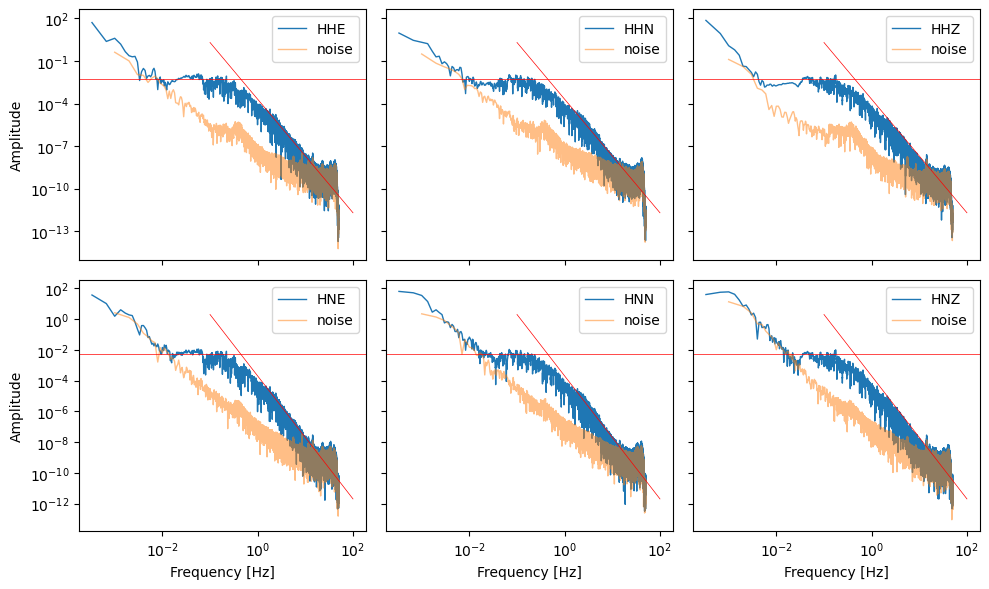

In [10]:
fig = lab.plot_fft(ground)
fig = lab.plot_fft(ground_noise, fig=fig, alpha=0.5, extra_label="noise")
fig.set_size_inches(10,6)

fs = 1e1**np.linspace(-1,2)
for ax in fig.axes:
    ax.axhline(5e-3,linewidth=0.5,color="red")
    ax.plot(fs,2e-4/fs**4,linewidth=0.5,color="red")

```{div} full-width
We set and apply the following zero-phase fourth-order band-pass Butterworth filter
```

In [19]:
from scipy import signal

bands = np.array([[1e-2,15],[1e-2,15],[5e-3,15],[2e-2,15],[2e-2,15],[2e-2,15]])

BA_filters = []
for band in bands:
    BA_filter = signal.butter(4, 2*np.pi*band, "bandpass", analog=True)
    BA_filters.append(BA_filter)

import lab
filtered_zerophase_stream = lab.filtering_zerophase(stream,BA_filters)

```{div} full-width
and we check the estimated ground motion by comparing the results from the velocimeter and the accelerometer
```

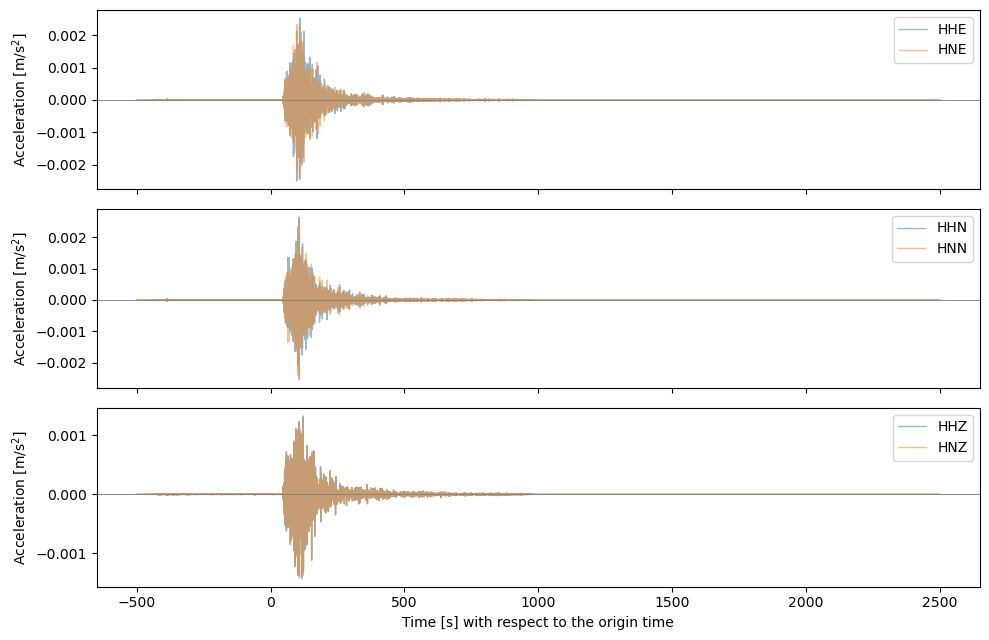

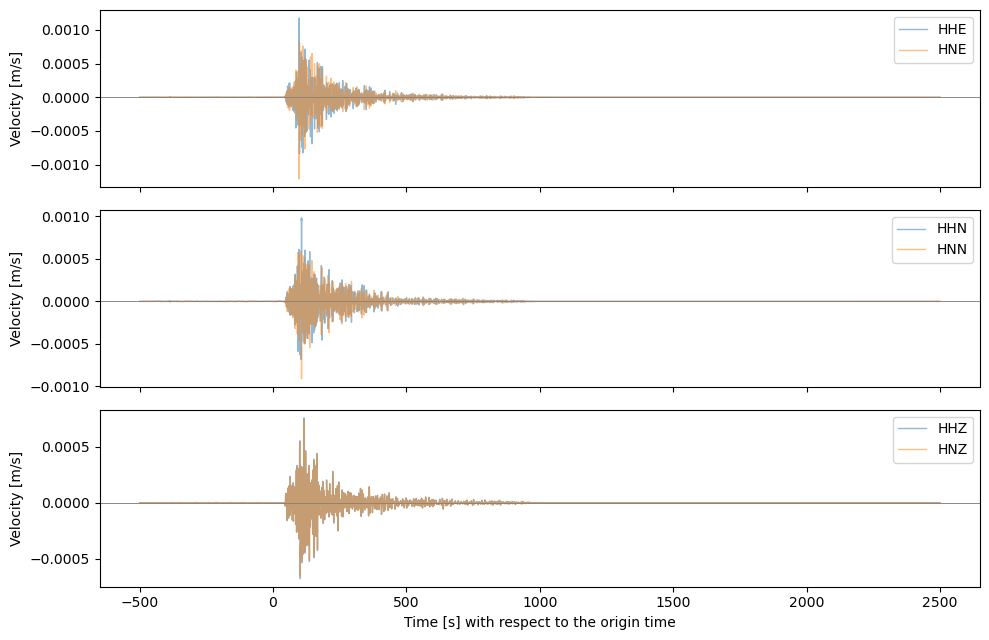

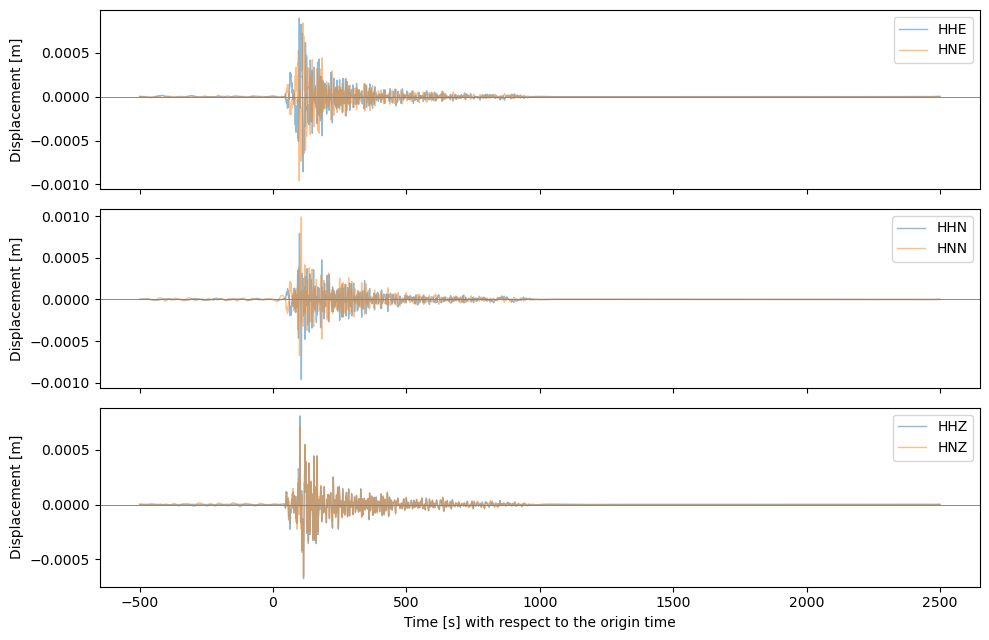

In [12]:
for output,label in zip( ["ACC","VEL","DISP"], ["Acceleration [m/s$^2$]", "Velocity [m/s]", "Displacement [m]"] ):
    ground = lab.remove_response(filtered_zerophase_stream,output=output)

    fig = lab.plot_time(ground.select(channel="HH*"), origin.time, alpha=0.5)
    fig = lab.plot_time(ground.select(channel="HN*"), origin.time, fig=fig, alpha=0.5)
    for ax in fig.axes:
        ax.set_ylabel(label)

```{div} full-width
Let us now focus on the ground displacements 
```

In [13]:
ground = lab.remove_response(filtered_zerophase_stream,output="DISP")

```{div} full-width
and simulate the *theoretical* recording of the Wood-Anderson seismometer
```

In [21]:
from theory import eva_FT_response

wood_gain = 2080
wood_period = 0.8
wood_damping = 0.7

wood = ground.copy()
for trace in wood:
    fs,Zs,n,d = lab.get_fft_trace(trace)
    ws = 2*np.pi*fs
    FT_response = eva_FT_response(fs, natural_period=wood_period, damping_ratio=wood_damping)
    FT_response *= wood_gain
    trace.data = np.fft.irfft(Zs * FT_response, n) / d


```{div} full-width
Here the plot of the *theoretical* recording of the Wood-Anderson seismometer
```

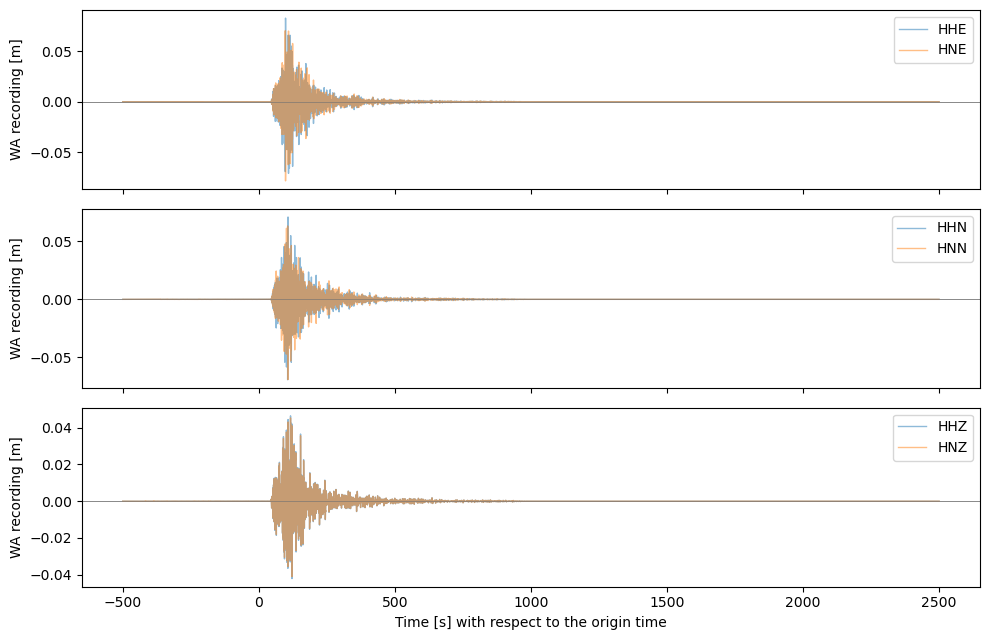

In [22]:
fig = lab.plot_time(wood.select(channel="HH*"), origin.time, alpha=0.5)
fig = lab.plot_time(wood.select(channel="HN*"), origin.time, alpha=0.5, fig=fig)
for ax in fig.axes:
    ax.set_ylabel("WA recording [m]")

```{div} full-width
Then, according to the definition of local magnitude, eq. {eq}`M:1`, we estimate the magnitude from both the velocimeter and the seismometer
```

In [16]:
for channel in ["HH*","HN*"]:
    MLs = []
    for trace in wood.select(channel=channel):
        ML = np.log10(abs(trace.data).max()) + 6 + distance_correction
        #print(trace.id,ML)
        MLs.append(ML)
    ML = max(MLs)
    print("channel:",channel,"  ML =",ML)

channel: HH*   ML = 5.774745550377361
channel: HN*   ML = 5.750586177411007


In [17]:
from myst_nb import glue
glue("mag",magnitude.mag)
glue("std",magnitude.mag_errors.uncertainty)

6.0

0.3

```{div} full-width
that are very close to each other and also consistent, within one-sigma error, with the estimate {glue:}`mag`$\pm${glue:}`std` of the Bollettino Sismico Italiano INGV
```

In [23]:
print(magnitude)

Magnitude
	    resource_id: ResourceIdentifier(id="smi:webservices.ingv.it/fdsnws/event/1/query?magnitudeId=29758611")
	            mag: 6.0 [uncertainty=0.3]
	 magnitude_type: 'ML'
	      origin_id: ResourceIdentifier(id="smi:webservices.ingv.it/fdsnws/event/1/query?originId=27629391")
	      method_id: ResourceIdentifier(id="smi:webservices.ingv.it/fdsnws/event/1/query?methodId=1")
	  station_count: 159
	  creation_info: CreationInfo(agency_id='INGV', author='Bollettino Sismico Italiano INGV', creation_time=UTCDateTime(2016, 8, 30, 10, 32, 53))


<p style="page-break-after:always;"></p>